In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV


In [122]:
#pip install xgboost

In [123]:
df_train = pd.read_csv('train.csv')
df_sample = pd.read_csv('sample_submission.csv')

In [124]:
df_train.head()

,ID,Type_of_AC,Model,Cooling_Capacity,Avg_Temp,Room_SIze,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,City,Input_Power,Electricity_Consumption_AC
0,795823,Split,1.5,6579.15,43,1873.5,3,3.0,5.0,0,1.720,31.333333,Cairo,2863.2952214614106,1.924
1,506848,Window,1.1,6775.44,46,1603.8000000000002,4,4.0,1.0,0,18.000,29.500000,Bucharest,2783.3096980924593,1.341
2,441027,Portable,3.8,6995.22,29,4807.0,38,4.0,1.0,0,0.551,13.763158,Berlin,2882.6064181342504,2.702
3,160677,Window,1.2,1863.68,39,1466.3999999999999,10,4.0,0.0,0,19.540,22.900000,Cape Town,2607.0895663486162,1.541
4,902932,Window,NaN,3089.04,40,3139.4,9,5.0,4.0,0,16.760,18.444444,Berlin,2681.3591611159786,2.182


In [125]:
df_sample.head()

,ID,Electricity_Consumption_AC
0,136515,1.868
1,961984,1.545
2,453259,2.155
3,724619,2.066
4,102491,2.951


In [126]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          15000 non-null  int64  
 1   Type_of_AC                  15000 non-null  object 
 2   Model                       14130 non-null  float64
 3   Cooling_Capacity            15000 non-null  float64
 4   Avg_Temp                    15000 non-null  int64  
 5   Room_SIze                   13987 non-null  object 
 6   Num_People                  15000 non-null  int64  
 7   Star_Rating                 14103 non-null  object 
 8   Age_of_Unit                 14018 non-null  float64
 9   Maintenance                 15000 non-null  int64  
 10  Avg_Usage                   15000 non-null  float64
 11  Avg_AC_Temp                 15000 non-null  float64
 12  City                        13506 non-null  object 
 13  Input_Power                 142

In [127]:
df_train.describe()

,ID,Model,Cooling_Capacity,Avg_Temp,Num_People,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,Electricity_Consumption_AC
count,15000.000000,14130.000000,15000.000000,15000.000000,15000.000000,14018.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,552100.445600,2.749264,5125.648041,36.461333,19.164067,2.992795,0.225800,11.225386,17.653861,2.119572
std,258986.255687,1.838315,3989.023423,5.007572,15.988777,2.004743,0.418122,5.328956,3.906928,0.391431
min,100117.000000,1.000000,1108.800000,18.000000,2.000000,0.000000,0.000000,0.000000,10.541667,0.791000
25%,331722.250000,1.700000,2879.172500,33.000000,10.000000,1.000000,0.000000,7.390750,14.727273,1.841000
50%,551519.500000,2.500000,4548.825000,36.000000,16.000000,3.000000,0.000000,11.618000,17.403704,2.117000
75%,777359.500000,3.300000,6170.120000,40.000000,25.000000,5.000000,0.000000,15.756000,20.094122,2.386250
max,999989.000000,15.600000,32556.680000,56.000000,250.000000,6.000000,1.000000,19.996000,41.000000,3.516000


C:\Users\T470s\AppData\Local\Temp\ipykernel_10332\3607279796.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, )


<Axes: >

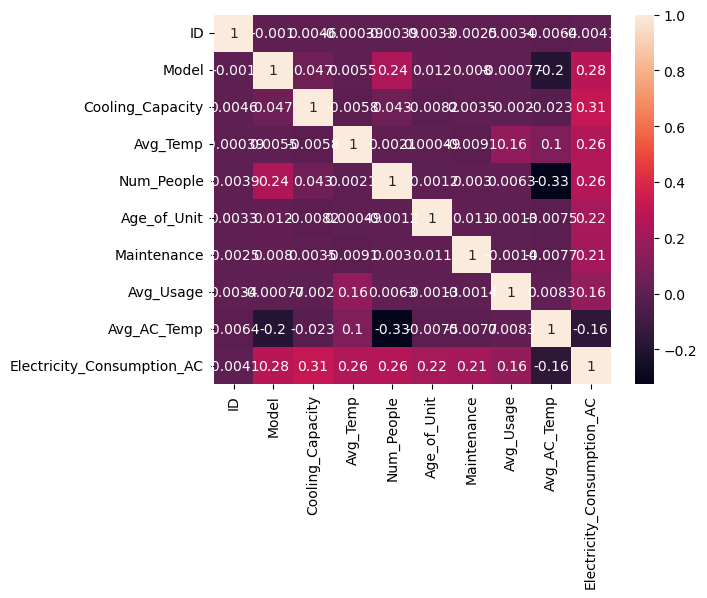

In [128]:
sns.heatmap(df_train.corr(), annot=True, )

In [129]:
df_train.isnull().sum()

ID                               0
Type_of_AC                       0
Model                          870
Cooling_Capacity                 0
Avg_Temp                         0
Room_SIze                     1013
Num_People                       0
Star_Rating                    897
Age_of_Unit                    982
Maintenance                      0
Avg_Usage                        0
Avg_AC_Temp                      0
City                          1494
Input_Power                    713
Electricity_Consumption_AC       0
dtype: int64

In [130]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df_train.columns if df_train[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df_train[feature].isnull().mean(), 4),  ' % missing values')

Model 0.058  % missing values
Room_SIze 0.0675  % missing values
Star_Rating 0.0598  % missing values
Age_of_Unit 0.0655  % missing values
City 0.0996  % missing values
Input_Power 0.0475  % missing values


C:\Users\T470s\AppData\Local\Temp\ipykernel_10332\2440704953.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Electricity_Consumption_AC'])


<Axes: xlabel='Electricity_Consumption_AC', ylabel='Density'>

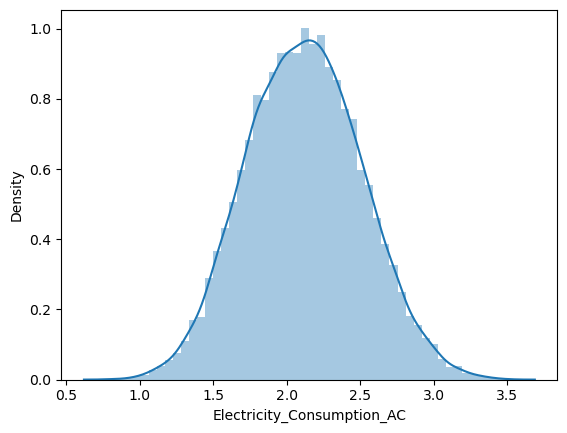

In [131]:
sns.distplot(df_train['Electricity_Consumption_AC'])

In [132]:
df_test = pd.read_csv('test.csv')
df_test.head()

,ID,Type_of_AC,Model,Cooling_Capacity,Avg_Temp,Room_SIze,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,City,Input_Power
0,191220,Portable,2.1,4283.40,35,NaN,9,NaN,5.0,0,8.770,14.888889,Moscow,2906.0447135703043
1,174111,Split,1.0,2157.10,29,1432.0,12,4.0,3.0,0,15.022,12.416667,Moscow,2807.713198343998
2,614605,Split,3.3,3484.60,31,4372.5,30,4.0,4.0,0,18.352,15.033333,Berlin,2723.183862010795
3,865325,Portable,2.6,1270.08,32,3255.2000000000003,9,2.0,0.0,0,16.512,15.555556,Cairo,2846.221681385789
4,134921,Ducted,2.0,4947.60,32,2730.0,24,5.0,2.0,1,17.856,11.333333,Delhi,3146.6627808826966


In [133]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                5000 non-null   int64  
 1   Type_of_AC        5000 non-null   object 
 2   Model             4705 non-null   float64
 3   Cooling_Capacity  5000 non-null   float64
 4   Avg_Temp          5000 non-null   int64  
 5   Room_SIze         4611 non-null   object 
 6   Num_People        5000 non-null   int64  
 7   Star_Rating       4724 non-null   object 
 8   Age_of_Unit       4665 non-null   float64
 9   Maintenance       5000 non-null   int64  
 10  Avg_Usage         5000 non-null   float64
 11  Avg_AC_Temp       5000 non-null   float64
 12  City              4513 non-null   object 
 13  Input_Power       4763 non-null   object 
dtypes: float64(5), int64(4), object(5)
memory usage: 547.0+ KB


In [134]:
dataset = df_train.copy()

In [135]:
dataset.shape

(15000, 15)

# Numerical Variables

In [136]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  10


,ID,Model,Cooling_Capacity,Avg_Temp,Num_People,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,Electricity_Consumption_AC
0,795823,1.5,6579.15,43,3,5.0,0,1.720,31.333333,1.924
1,506848,1.1,6775.44,46,4,1.0,0,18.000,29.500000,1.341
2,441027,3.8,6995.22,29,38,1.0,0,0.551,13.763158,2.702
3,160677,1.2,1863.68,39,10,0.0,0,19.540,22.900000,1.541
4,902932,NaN,3089.04,40,9,4.0,0,16.760,18.444444,2.182


In [137]:
dataset.shape

(15000, 15)

In [138]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [139]:
discrete_feature

['Age_of_Unit', 'Maintenance']

In [140]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 8


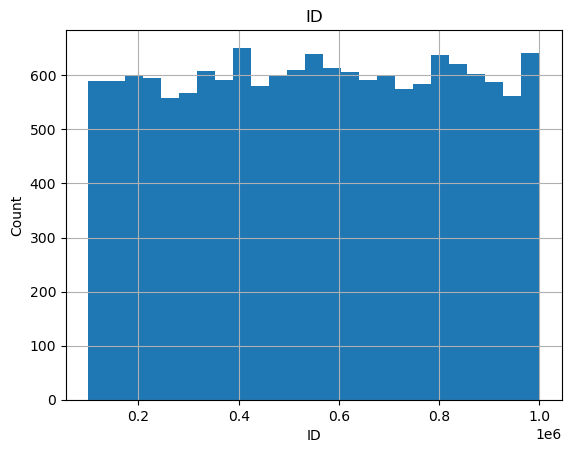

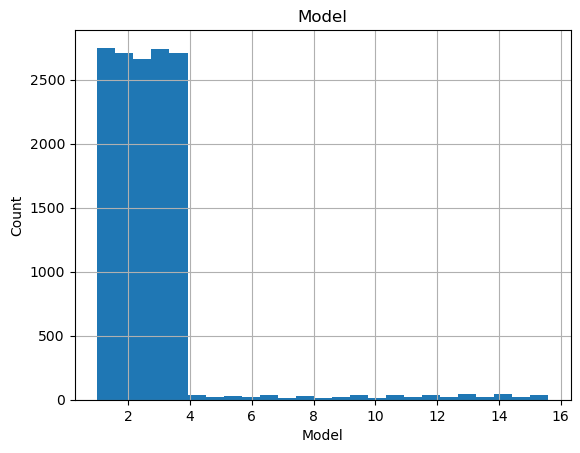

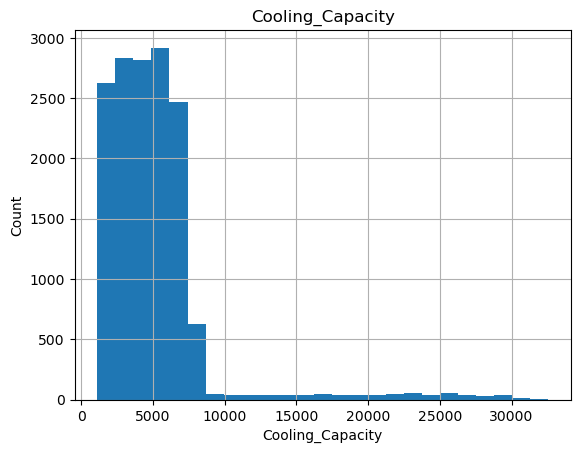

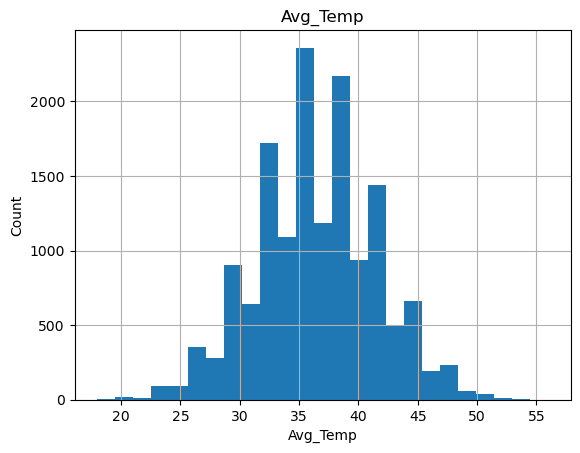

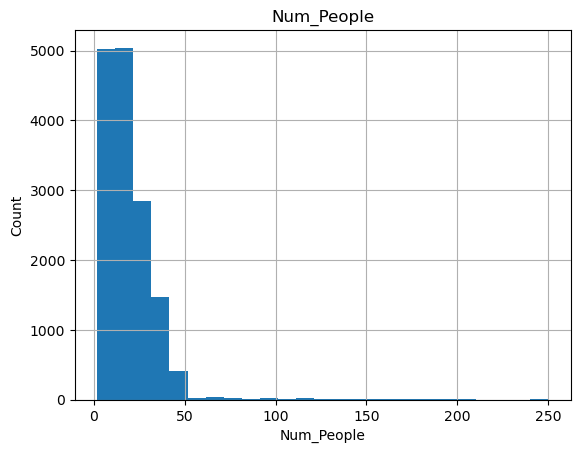

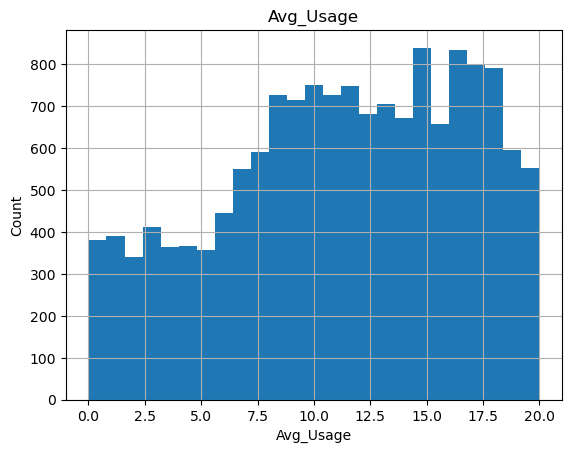

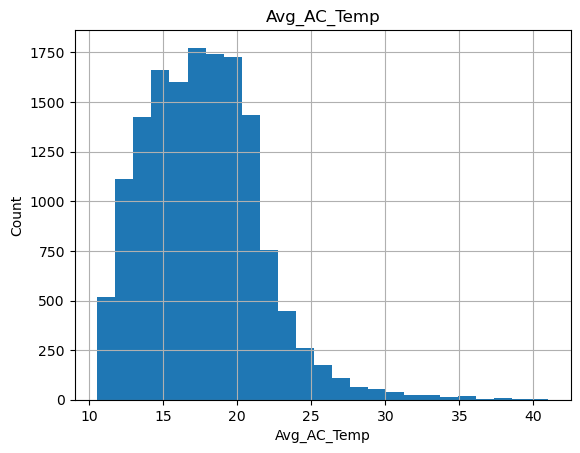

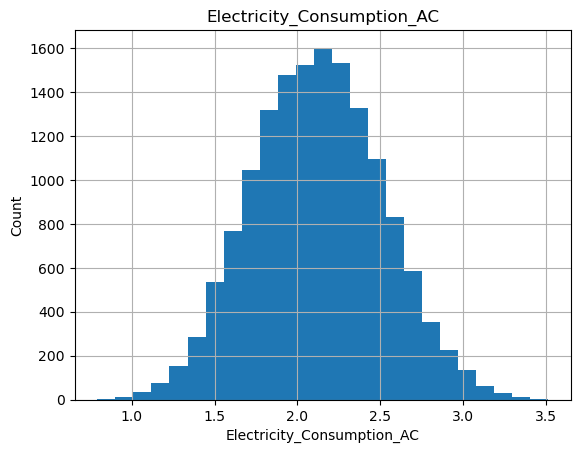

In [141]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# Outliers

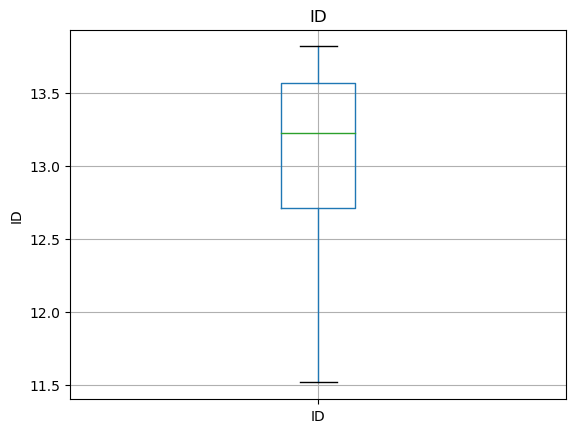

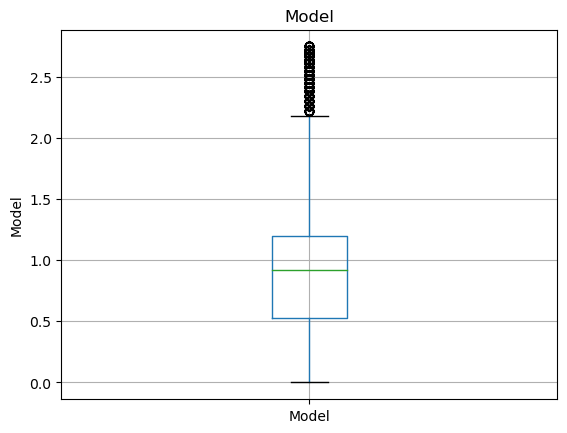

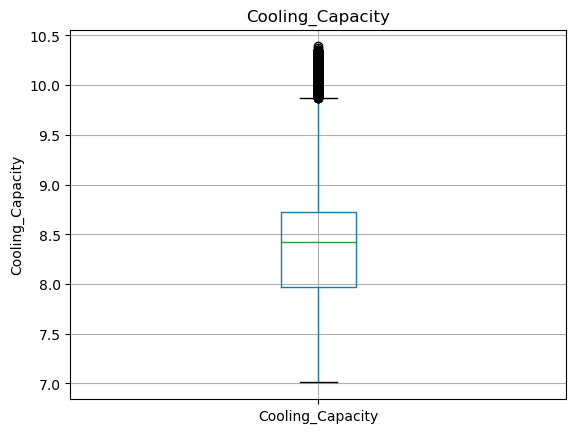

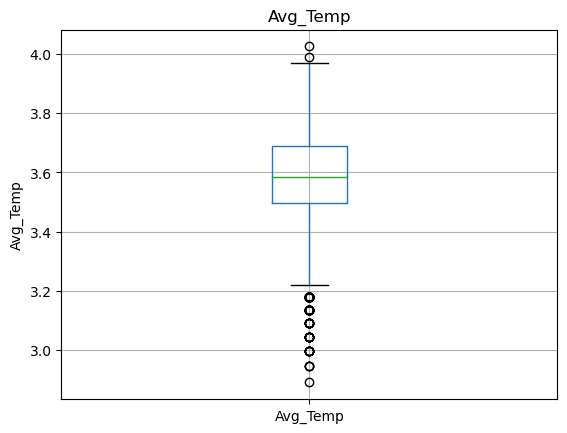

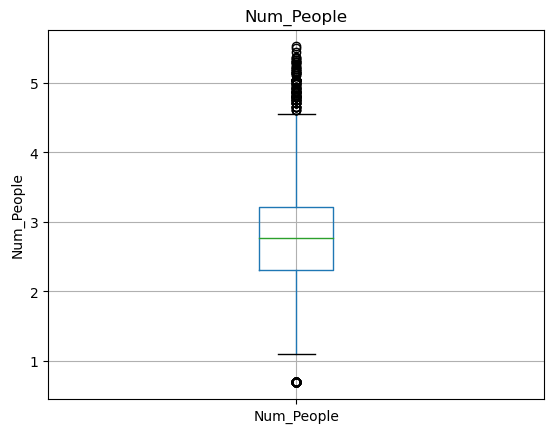

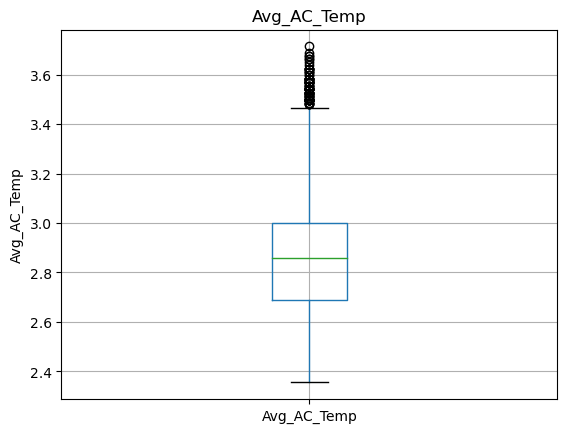

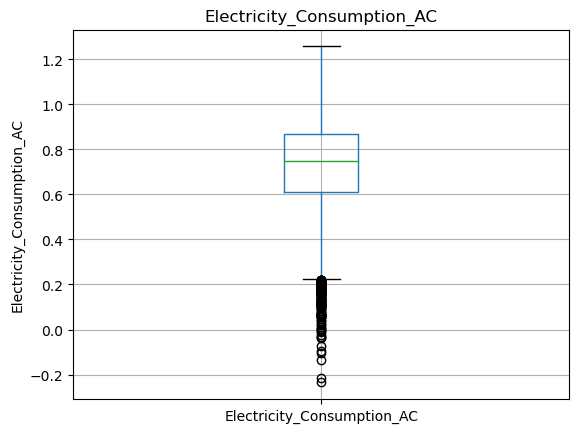

In [142]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

## Categorical

In [143]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['Type_of_AC', 'Room_SIze', 'Star_Rating', 'City', 'Input_Power']

In [144]:
data[categorical_features].head()


,Type_of_AC,Room_SIze,Star_Rating,City,Input_Power
0,Split,1873.5,3.0,Cairo,2863.2952214614106
1,Window,1603.8000000000002,4.0,Bucharest,2783.3096980924593
2,Portable,4807.0,4.0,Berlin,2882.6064181342504
3,Window,1466.3999999999999,4.0,Cape Town,2607.0895663486162
4,Window,3139.4,5.0,Berlin,2681.3591611159786


# Missing Values

In [145]:
from sklearn.impute import KNNImputer,SimpleImputer

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          15000 non-null  int64  
 1   Type_of_AC                  15000 non-null  object 
 2   Model                       14130 non-null  float64
 3   Cooling_Capacity            15000 non-null  float64
 4   Avg_Temp                    15000 non-null  int64  
 5   Room_SIze                   13987 non-null  object 
 6   Num_People                  15000 non-null  int64  
 7   Star_Rating                 14103 non-null  object 
 8   Age_of_Unit                 14018 non-null  float64
 9   Maintenance                 15000 non-null  int64  
 10  Avg_Usage                   15000 non-null  float64
 11  Avg_AC_Temp                 15000 non-null  float64
 12  City                        13506 non-null  object 
 13  Input_Power                 142

In [147]:
data.head(10)

,ID,Type_of_AC,Model,Cooling_Capacity,Avg_Temp,Room_SIze,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,City,Input_Power,Electricity_Consumption_AC
0,795823,Split,1.5,6579.15,43,1873.5,3,3.0,5.0,0,1.720,31.333333,Cairo,2863.2952214614106,0.654406
1,506848,Window,1.1,6775.44,46,1603.8000000000002,4,4.0,1.0,0,18.000,29.500000,Bucharest,2783.3096980924593,0.293416
2,441027,Portable,3.8,6995.22,29,4807.0,38,4.0,1.0,0,0.551,13.763158,Berlin,2882.6064181342504,0.993992
3,160677,Window,1.2,1863.68,39,1466.3999999999999,10,4.0,0.0,0,19.540,22.900000,Cape Town,2607.0895663486162,0.432432
4,902932,Window,NaN,3089.04,40,3139.4,9,5.0,4.0,0,16.760,18.444444,Berlin,2681.3591611159786,0.780242
5,553568,Portable,2.2,6014.60,43,3113.0000000000005,6,4.0,6.0,1,17.286,18.166667,Moscow,2994.4946029176726,0.942738
6,575810,Ducted,1.8,1782.98,34,2527.2000000000003,17,5.0,5.0,0,2.516,14.000000,Delhi,2964.5337108869016,0.468753
7,820893,Ducted,2.5,2413.75,35,3100.0,24,5.0,3.0,0,11.970,14.458333,Sao Paolo,2637.2276224551442,0.527093
8,560651,Ducted,1.3,7543.88,38,1818.7,9,1.0,6.0,0,12.738,17.222222,Berlin,2719.611325792581,0.817575
9,475468,Split,3.4,6732.16,34,4331.599999999999,30,3.0,3.0,0,18.768,17.133333,New York,2986.4383664448396,0.873383


In [148]:
data[ 'Type_of_AC'].value_counts()


Portable    3786
Ducted      3779
Window      3733
Split       3702
Name: Type_of_AC, dtype: int64

In [149]:
data[ 'City'].value_counts()

Berlin       1910
Sao Paolo    1802
Moscow       1546
Mumbai       1238
Bucharest    1184
Tokyo        1086
Delhi         997
Geneva        757
Cape Town     740
Seoul         736
New York      725
Cairo         558
Prague        198
__              7
?               5
-10e9           5
$$              4
.               4
blank           3
1k              1
Name: City, dtype: int64

In [150]:
data[ 'Input_Power'].value_counts()

blank                 4
.                     3
-10e9                 3
2775.185706792389     2
?                     2
                     ..
2871.271919993388     1
2703.373783784543     1
2653.3504169386447    1
2796.0819654777365    1
3267.6594424896157    1
Name: Input_Power, Length: 14277, dtype: int64

In [151]:


# Define the list of values you want to drop
values_to_drop = ['?','$$', '__', '.', 'blank', '-10e9','1k','-1.00E+10']

# Filter and drop rows containing these values in any column
data = data[~data.isin(values_to_drop).any(axis=1)]

# Reset the index after dropping rows
data = data.reset_index(drop=True)


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14917 entries, 0 to 14916
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14917 non-null  int64  
 1   Type_of_AC                  14917 non-null  object 
 2   Model                       14050 non-null  float64
 3   Cooling_Capacity            14917 non-null  float64
 4   Avg_Temp                    14917 non-null  int64  
 5   Room_SIze                   13908 non-null  object 
 6   Num_People                  14917 non-null  int64  
 7   Star_Rating                 14021 non-null  object 
 8   Age_of_Unit                 13942 non-null  float64
 9   Maintenance                 14917 non-null  int64  
 10  Avg_Usage                   14917 non-null  float64
 11  Avg_AC_Temp                 14917 non-null  float64
 12  City                        13430 non-null  object 
 13  Input_Power                 142

In [153]:
data['Room_SIze'] = data['Room_SIze'].astype('float')

In [154]:
data['Star_Rating'] = data['Star_Rating'].astype('float')
data['Input_Power'] = data['Input_Power'].astype('float')

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14917 entries, 0 to 14916
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14917 non-null  int64  
 1   Type_of_AC                  14917 non-null  object 
 2   Model                       14050 non-null  float64
 3   Cooling_Capacity            14917 non-null  float64
 4   Avg_Temp                    14917 non-null  int64  
 5   Room_SIze                   13908 non-null  float64
 6   Num_People                  14917 non-null  int64  
 7   Star_Rating                 14021 non-null  float64
 8   Age_of_Unit                 13942 non-null  float64
 9   Maintenance                 14917 non-null  int64  
 10  Avg_Usage                   14917 non-null  float64
 11  Avg_AC_Temp                 14917 non-null  float64
 12  City                        13430 non-null  object 
 13  Input_Power                 142

In [156]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(data[feature].isnull().mean(),4)))

City: 0.0997% missing values


In [157]:
## Replace missing value with a new label
def replace_cat_feature(data,features_nan):
   
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

data=replace_cat_feature(data,features_nan)

data[features_nan].isnull().sum()

City    0
dtype: int64

In [158]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(data[feature].isnull().mean(),4)))

Model: 0.0581% missing value
Room_SIze: 0.0676% missing value
Star_Rating: 0.0601% missing value
Age_of_Unit: 0.0654% missing value
Input_Power: 0.0475% missing value


In [159]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=data[feature].median()
    
    ## create a new feature to capture nan values
    data[feature+'nan']=np.where(data[feature].isnull(),1,0)
    data[feature].fillna(median_value,inplace=True)
    
data[numerical_with_nan].isnull().sum()
    
    

Model          0
Room_SIze      0
Star_Rating    0
Age_of_Unit    0
Input_Power    0
dtype: int64

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14917 entries, 0 to 14916
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14917 non-null  int64  
 1   Type_of_AC                  14917 non-null  object 
 2   Model                       14917 non-null  float64
 3   Cooling_Capacity            14917 non-null  float64
 4   Avg_Temp                    14917 non-null  int64  
 5   Room_SIze                   14917 non-null  float64
 6   Num_People                  14917 non-null  int64  
 7   Star_Rating                 14917 non-null  float64
 8   Age_of_Unit                 14917 non-null  float64
 9   Maintenance                 14917 non-null  int64  
 10  Avg_Usage                   14917 non-null  float64
 11  Avg_AC_Temp                 14917 non-null  float64
 12  City                        14917 non-null  object 
 13  Input_Power                 149

# Handling Categorical Feature

In [161]:
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']

In [162]:
categorical_features

['Type_of_AC', 'City']

In [163]:
data.head(20)

,ID,Type_of_AC,Model,Cooling_Capacity,Avg_Temp,Room_SIze,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,City,Input_Power,Electricity_Consumption_AC,Modelnan,Room_SIzenan,Star_Ratingnan,Age_of_Unitnan,Input_Powernan
0,795823,Split,1.5,6579.15,43,1873.5,3,3.0,5.0,0,1.720,31.333333,Cairo,2863.295221,0.654406,0,0,0,0,0
1,506848,Window,1.1,6775.44,46,1603.8,4,4.0,1.0,0,18.000,29.500000,Bucharest,2783.309698,0.293416,0,0,0,0,0
2,441027,Portable,3.8,6995.22,29,4807.0,38,4.0,1.0,0,0.551,13.763158,Berlin,2882.606418,0.993992,0,0,0,0,0
3,160677,Window,1.2,1863.68,39,1466.4,10,4.0,0.0,0,19.540,22.900000,Cape Town,2607.089566,0.432432,0,0,0,0,0
4,902932,Window,2.5,3089.04,40,3139.4,9,5.0,4.0,0,16.760,18.444444,Berlin,2681.359161,0.780242,1,0,0,0,0
5,553568,Portable,2.2,6014.60,43,3113.0,6,4.0,6.0,1,17.286,18.166667,Moscow,2994.494603,0.942738,0,0,0,0,0
6,575810,Ducted,1.8,1782.98,34,2527.2,17,5.0,5.0,0,2.516,14.000000,Delhi,2964.533711,0.468753,0,0,0,0,0
7,820893,Ducted,2.5,2413.75,35,3100.0,24,5.0,3.0,0,11.970,14.458333,Sao Paolo,2637.227622,0.527093,0,0,0,0,0
8,560651,Ducted,1.3,7543.88,38,1818.7,9,1.0,6.0,0,12.738,17.222222,Berlin,2719.611326,0.817575,0,0,0,0,0
9,475468,Split,3.4,6732.16,34,4331.6,30,3.0,3.0,0,18.768,17.133333,New York,2986.438366,0.873383,0,0,0,0,0


In [164]:
#from sklearn.compose import ColumnTransformer
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import OrdinalEncoder
#transformer = ColumnTransformer(transformers=[
#    ('tnf1',SimpleImputer(),['Model','Cooling_Capacity','Avg_Temp','Room_SIze','Num_People','Star_Rating','Age_of_Unit','Avg_Usage','Avg_AC_Temp','Input_Power']),
#    ('tnf2',OneHotEncoder(sparse=False,drop='first'),['Type_of_AC','City'])
#],remainder='passthrough')

In [165]:
#X_train = data.copy()
#transformer.fit_transform(X_train).shape

In [166]:
#X_train

# Handling Test file


In [167]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                5000 non-null   int64  
 1   Type_of_AC        5000 non-null   object 
 2   Model             4705 non-null   float64
 3   Cooling_Capacity  5000 non-null   float64
 4   Avg_Temp          5000 non-null   int64  
 5   Room_SIze         4611 non-null   object 
 6   Num_People        5000 non-null   int64  
 7   Star_Rating       4724 non-null   object 
 8   Age_of_Unit       4665 non-null   float64
 9   Maintenance       5000 non-null   int64  
 10  Avg_Usage         5000 non-null   float64
 11  Avg_AC_Temp       5000 non-null   float64
 12  City              4513 non-null   object 
 13  Input_Power       4763 non-null   object 
dtypes: float64(5), int64(4), object(5)
memory usage: 547.0+ KB


In [168]:
# Define the list of values you want to drop
values_to_drop = ['?','$$', '__', '.', 'blank', '-10e9','1k','-1.00E+10']

# Filter and drop rows containing these values in any column
df_test =df_test[~df_test.isin(values_to_drop).any(axis=1)]

# Reset the index after dropping rows
df_test =df_test.reset_index(drop=True)

In [169]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4977 entries, 0 to 4976
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4977 non-null   int64  
 1   Type_of_AC        4977 non-null   object 
 2   Model             4684 non-null   float64
 3   Cooling_Capacity  4977 non-null   float64
 4   Avg_Temp          4977 non-null   int64  
 5   Room_SIze         4588 non-null   object 
 6   Num_People        4977 non-null   int64  
 7   Star_Rating       4706 non-null   object 
 8   Age_of_Unit       4642 non-null   float64
 9   Maintenance       4977 non-null   int64  
 10  Avg_Usage         4977 non-null   float64
 11  Avg_AC_Temp       4977 non-null   float64
 12  City              4492 non-null   object 
 13  Input_Power       4741 non-null   object 
dtypes: float64(5), int64(4), object(5)
memory usage: 544.5+ KB


In [175]:
df_test1=df_test.copy()
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4977 entries, 0 to 4976
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4977 non-null   int64  
 1   Type_of_AC        4977 non-null   object 
 2   Model             4684 non-null   float64
 3   Cooling_Capacity  4977 non-null   float64
 4   Avg_Temp          4977 non-null   int64  
 5   Room_SIze         4588 non-null   float64
 6   Num_People        4977 non-null   int64  
 7   Star_Rating       4706 non-null   float64
 8   Age_of_Unit       4642 non-null   float64
 9   Maintenance       4977 non-null   int64  
 10  Avg_Usage         4977 non-null   float64
 11  Avg_AC_Temp       4977 non-null   float64
 12  City              4492 non-null   object 
 13  Input_Power       4741 non-null   float64
dtypes: float64(8), int64(4), object(2)
memory usage: 544.5+ KB


In [176]:
df_test['Room_SIze'] = df_test['Room_SIze'].astype('float')
df_test['Star_Rating'] = df_test['Star_Rating'].astype('float')
df_test['Input_Power'] = df_test['Input_Power'].astype('float')

In [177]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan_test=[feature for feature in df_test.columns if df_test[feature].isnull().sum()>1 and df_test[feature].dtypes=='O']

for feature in features_nan_test:
    print("{}: {}% missing values".format(feature,np.round(df_test[feature].isnull().mean(),4)))

City: 0.0974% missing values


In [180]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4977 entries, 0 to 4976
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4977 non-null   int64  
 1   Type_of_AC        4977 non-null   object 
 2   Model             4684 non-null   float64
 3   Cooling_Capacity  4977 non-null   float64
 4   Avg_Temp          4977 non-null   int64  
 5   Room_SIze         4588 non-null   float64
 6   Num_People        4977 non-null   int64  
 7   Star_Rating       4706 non-null   float64
 8   Age_of_Unit       4642 non-null   float64
 9   Maintenance       4977 non-null   int64  
 10  Avg_Usage         4977 non-null   float64
 11  Avg_AC_Temp       4977 non-null   float64
 12  City              4492 non-null   object 
 13  Input_Power       4741 non-null   float64
dtypes: float64(8), int64(4), object(2)
memory usage: 544.5+ KB


In [182]:
## Replace missing value with a new label
def replace_cat_feature_test(df_test,features_nan_test):
   
    df_test[features_nan_test]=df_test[features_nan_test].fillna('Missing')
    return data

df_test=replace_cat_feature(df_test,features_nan_test)

df_test[features_nan_test].isnull().sum()

City    0
dtype: int64

In [183]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4977 entries, 0 to 4976
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4977 non-null   int64  
 1   Type_of_AC        4977 non-null   object 
 2   Model             4684 non-null   float64
 3   Cooling_Capacity  4977 non-null   float64
 4   Avg_Temp          4977 non-null   int64  
 5   Room_SIze         4588 non-null   float64
 6   Num_People        4977 non-null   int64  
 7   Star_Rating       4706 non-null   float64
 8   Age_of_Unit       4642 non-null   float64
 9   Maintenance       4977 non-null   int64  
 10  Avg_Usage         4977 non-null   float64
 11  Avg_AC_Temp       4977 non-null   float64
 12  City              4977 non-null   object 
 13  Input_Power       4741 non-null   float64
dtypes: float64(8), int64(4), object(2)
memory usage: 544.5+ KB


In [184]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan_test=[feature for feature in df_test.columns if df_test[feature].isnull().sum()>1 and df_test[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan_test:
    print("{}: {}% missing value".format(feature,np.around(df_test[feature].isnull().mean(),4)))

Model: 0.0589% missing value
Room_SIze: 0.0782% missing value
Star_Rating: 0.0545% missing value
Age_of_Unit: 0.0673% missing value
Input_Power: 0.0474% missing value


In [185]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan_test:
    ## We will replace by using median since there are outliers
    median_value=df_test[feature].median()
    
    ## create a new feature to capture nan values
    df_test[feature+'nan']=np.where(df_test[feature].isnull(),1,0)
    df_test[feature].fillna(median_value,inplace=True)
    
df_test[numerical_with_nan_test].isnull().sum()
    

Model          0
Room_SIze      0
Star_Rating    0
Age_of_Unit    0
Input_Power    0
dtype: int64

In [186]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4977 entries, 0 to 4976
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4977 non-null   int64  
 1   Type_of_AC        4977 non-null   object 
 2   Model             4977 non-null   float64
 3   Cooling_Capacity  4977 non-null   float64
 4   Avg_Temp          4977 non-null   int64  
 5   Room_SIze         4977 non-null   float64
 6   Num_People        4977 non-null   int64  
 7   Star_Rating       4977 non-null   float64
 8   Age_of_Unit       4977 non-null   float64
 9   Maintenance       4977 non-null   int64  
 10  Avg_Usage         4977 non-null   float64
 11  Avg_AC_Temp       4977 non-null   float64
 12  City              4977 non-null   object 
 13  Input_Power       4977 non-null   float64
 14  Modelnan          4977 non-null   int32  
 15  Room_SIzenan      4977 non-null   int32  
 16  Star_Ratingnan    4977 non-null   int32  


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14917 entries, 0 to 14916
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14917 non-null  int64  
 1   Type_of_AC                  14917 non-null  object 
 2   Model                       14917 non-null  float64
 3   Cooling_Capacity            14917 non-null  float64
 4   Avg_Temp                    14917 non-null  int64  
 5   Room_SIze                   14917 non-null  float64
 6   Num_People                  14917 non-null  int64  
 7   Star_Rating                 14917 non-null  float64
 8   Age_of_Unit                 14917 non-null  float64
 9   Maintenance                 14917 non-null  int64  
 10  Avg_Usage                   14917 non-null  float64
 11  Avg_AC_Temp                 14917 non-null  float64
 12  City                        14917 non-null  object 
 13  Input_Power                 149

# Splitting the data into train & test data

In [193]:
# Splitting the dataset into X and y
y= data['Electricity_Consumption_AC']
X = data.drop(['Electricity_Consumption_AC'], axis=1)

In [198]:
X_train,X_vald,y_train,y_vald = train_test_split(X,y,test_size=0.15,random_state=2)

# RandomForestRegressor

In [199]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,12])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_vald)

print('R2 score',r2_score(y_vald,y_pred))


C:\Users\T470s\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.7127208251941592


# XGBRegressor

In [200]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,12])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_vald)

print('R2 score',r2_score(y_vald,y_pred))


C:\Users\T470s\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.72528385006115


# GradientBoostingRegressor

In [203]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,12])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500,max_features=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_vald)

print('R2 score',r2_score(y_vald,y_pred))


C:\Users\T470s\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.7656714236767874


# Final Prediction


In [204]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,12])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500,max_features=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# Separate the target variable from the training data
X_train = data.drop(columns=['Electricity_Consumption_AC'])
y_train = data['Electricity_Consumption_AC']


# Fit the model to the training data
pipe.fit(X_train,y_train)


# Make predictions on the test data
X_test = df_test  
predictions = pipe.predict(X_test)

# Calculate the R2 score
y_true = data['Electricity_Consumption_AC']
r2 = r2_score(y_true, pipe.predict(X_train))
print(f'R2 Score: {r2}')



C:\Users\T470s\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score: 0.8133849578725603


In [206]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'ID': df_test['ID'],
    'Electricity_Consumption_AC': predictions
})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

In [207]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4977 entries, 0 to 4976
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          4977 non-null   int64  
 1   Electricity_Consumption_AC  4977 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 77.9 KB


In [208]:
submission.head()

,ID,Electricity_Consumption_AC
0,191220,0.749788
1,174111,0.343684
2,614605,0.743154
3,865325,0.543968
4,134921,0.701344
